In [13]:
import pandas as pd
import numpy as np
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


The correlation coefficient r is: 0.9545980771462478


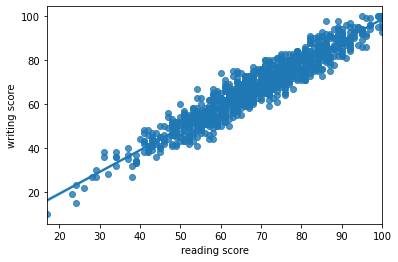

In [12]:
# scatter plot using the real reading scores and the real writing scores
import seaborn as sns
sns.regplot(x = 'reading score', y = 'writing score', data = df)

r = np.corrcoef(df['reading score'], df['writing score'])
print('The correlation coefficient r is:', r[0, 1])

In [14]:
# the application of linear regression Machine learning model
from sklearn.linear_model import LinearRegression
# build linear regression model
model = LinearRegression()
model.fit(df[['reading score']], df['writing score'])
df['Predicted Writing Score'] = model.predict(df[['reading score']])
df['error'] = df['writing score'] - df['Predicted Writing Score']

# return the df with predicted values and residuals
print('The prediction error across all students is:', df['error'].sum())
df

The prediction error across all students is: -7.794653811288299e-12


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Predicted Writing Score,error
0,female,group B,bachelor's degree,standard,none,72,72,74,70.866687,3.133313
1,female,group C,some college,standard,completed,69,90,88,88.750247,-0.750247
2,female,group B,master's degree,standard,none,90,95,93,93.717902,-0.717902
3,male,group A,associate's degree,free/reduced,none,47,57,44,55.963720,-11.963720
4,male,group C,some college,standard,none,76,78,75,76.827873,-1.827873
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,97.692027,-2.692027
996,male,group C,high school,free/reduced,none,62,55,55,53.976658,1.023342
997,female,group C,high school,free/reduced,completed,59,71,65,69.873155,-4.873155
998,female,group D,some college,standard,completed,68,78,77,76.827873,0.172127


The correlation coefficient r is: 0.9999999999999997
The intercept (ß0) = -0.6675536409329368.
The slope (ß1) = [0.99353111].


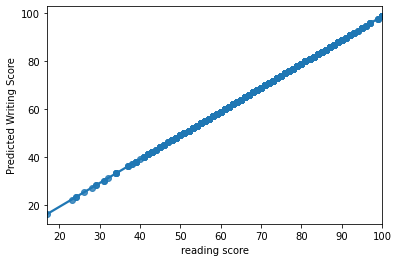

In [15]:
# scatter plot using the real reading scores and the predicted writing scores
sns.regplot(x = 'reading score', y = 'Predicted Writing Score', data = df)

# find correlation coefficient r
r = np.corrcoef(df['reading score'], df['Predicted Writing Score'])
print('The correlation coefficient r is:', r[0, 1])

# describe the linear regression model
b1 = model.coef_
b0 = model.intercept_
print("The intercept (ß0) = " + str(b0) + ".")
print("The slope (ß1) = " + str(b1) + ".")